# Objectives

By the end of this section, you will be able to:

* Calculate the total force (magnitude and direction) exerted on a test charge from more than one charge.
* Describe an electric field diagram of a positive point charge and of a negative point charge with twice the magnitude of the positive charge.
* Draw the electric field lines between two points of the same charge and between two points of opposite charge.

In [3]:
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib import cm 
import pandas as pd
from vpython import *

%matplotlib notebook

<IPython.core.display.Javascript object>

# Electric Fields

A field is a way of conceptualizing and mapping the force that surrounds any object and acts on another object at a distance without apparent physical connection. For example, the gravitational field surrounding the earth (and all other masses) represents the gravitational force that would be experienced if another mass were placed at a given point within the field.

In the same way, the Coulomb force field surrounding any charge extends throughout space. Using Coulomb's law, 

\begin{equation}
  F = k \frac{|q_1q_2|}{r^2}
\end{equation}

its magnitude is given by the equation  

\begin{equation}
  F = k \frac{|qQ|}{r^2}
\end{equation}

, for a **point charge** (a particle having a charge  $Q$ ) acting on a **test charge**  $q$  at a distance  $r$. Both the magnitude and direction of the Coulomb force field depend on  $Q$  and the test charge  $q$. It is by convention that we use a positive test charge. After a bit of algebra we get our final equationf or the electric field to be:

\begin{equation}
  E = k \frac{|Q|}{r^2}
\end{equation}

The electric field is thus seen to depend only on the charge  $Q$  and the distance  $r$ ; it is completely independent of the test charge  $q$.

Just as we did with **Coulomb's Law** previously, we can use the `def` function to produce a function we can use to model the electric field of a charged particle. Run the cell below to define our electric field function.

In [4]:
def E(k,Q,r):
    E = k*np.abs(Q)/r**2
    return E

Now that we have defined the E field function, we can define our point charge and our radius to model the electric field around a point charge. Run the cell below to examine how the **electric field** as we move them from  0.1𝑚  to  1𝑚  apart.

<IPython.core.display.Javascript object>


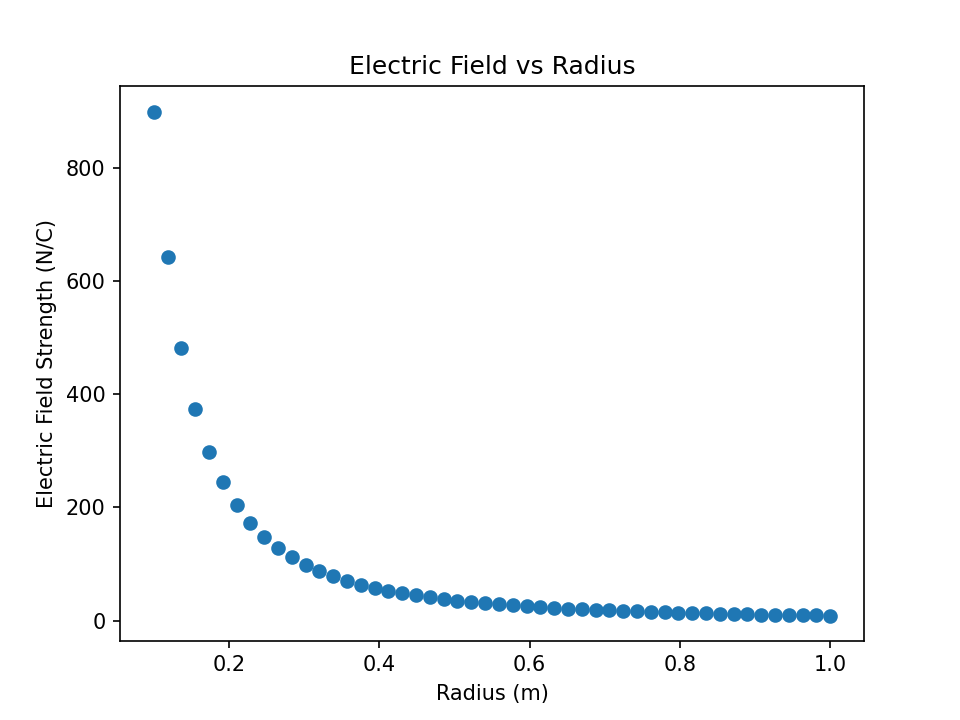

In [5]:
#Define Coulombs constant and charges
k = 8.99E9 
Q = 1E-9


#Create an array of points from 0.1m to 1m with 50 interations
r = np.linspace(0.1,1,50) 

#Define varible for y-axis using our previously defined function
y = E(k,Q,r)   

#Plot radius and defined varible andd set axis labels
plt.scatter(r,y)
plt.xlabel('Radius (m)')
plt.ylabel('Electric Field Strength (N/C)')
plt.title('Electric Field vs Radius');

To model this in our VPython enviroment, we are going to need to set up an observation location for each point starting starting from the origin and determine the electric field at each location. Let's start with just the `x-direction`. We will observe the electric field at each point from $0$ to $2\pi$. We can use a `while` loop to produce vectors around our charge at each point **while** the angle `theta` is less then $2\pi$.

In [6]:
#Define a scene for the Vpython simulation
scene = canvas()
scene.width = 500
scene.height = 600
scene.background = color.white
scene.range = 0.1
scene.center = vector(0,0,0)

#Define Coulombs constant and charges
k = 9e9
q = 1e-9

#Create objects in the Vpython simulation scene.
q_p = sphere(pos=vector(0,0,0), radius=2E-3, color=color.red, charge = q )

#Define the radius of the observation location and angle theta
R = 0.03
theta = 0

#Define the number of steps we wish to take in our dtheta varible
N = 24
dtheta = 2*pi/N
Escale = 3e-6

#Define the while loop for the vector at the observation locations
while theta<2*pi:
    rate(1)
    r_o = R*vector(cos(theta),sin(theta),0)
    
    r_p = r_o-q_p.pos
    E_p = k*q_p.charge*r_p/mag(r_p)**3
    
    E_vector = arrow(pos=r_o, axis=Escale*E_p, color = color.orange)
    theta = theta + dtheta


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recall what we said about the electric field vector being measured with respect to a positive test charge. In the cell below, edit the `charge` and `color` of the particle to see how the `E` field changes with a negative charge.

In [ ]:
#Define a scene for the Vpython simulation
scene = canvas()
scene.width = 500
scene.height = 600
scene.background = color.white
scene.range = 0.1
scene.center = vector(0,0,0)

#Define Coulombs constant and charges
k = 9e9
q = 1e-9

#Create objects in the Vpython simulation scene.
q_n = sphere(pos=vector(0,0,0), radius=2E-3, color=color.??, charge =?? )

#Define the radius of the observation location and angle theta
R = 0.03
theta = 0

#Define the number of steps we wish to take in our dtheta varible
N = 24
dtheta = 2*pi/N
Escale = 3e-6

#Define the while loop for the vector at the observation locations
while theta<2*pi:
    rate(1)
    r_o = R*vector(cos(theta),sin(theta),0)
    
    r_n = r_o-q_n.pos
    E_n = k*q_n.charge*r_n/mag(r_p)**3
    
    E_vector = arrow(pos=r_o, axis=Escale*E_n, color = color.orange)
    theta = theta + dtheta


If we place the test charge at all points in space, we end up with a field of vectors that represents the electric field of the charged particle. Run the code below for a interactive visualization of the electric field surrounding a **positive charge**. Take note of the direction and magnitude of the vectors at all points around the charge.

In [ ]:
scene = canvas()
scene.width = 700
scene.height = 800
scene.background = color.white
scene.range = 18
scene.center = vector(0,0,0)

obsloc = []
arrows = []

K = 15
q = sphere(pos=vector(0,0,0), color=color.red, radius=0.6, charge=1)

vecspace = arange(-5, 6, 2)
for x in vecspace:
    for y in vecspace:
        for z in vecspace:
            obsloc.append(vector(x,y,z))
            a = arrow(pos=vector(x,y,z), axis=vector(0, 0.1, 0), color=color.orange, shaftwidth=0.2)
            r = a.pos-q.pos
            if mag(r) == 0:
                a.axis = vector(0,0,0)
            else:
                E = K*q.charge*r/(mag(r)**2)
                a.axis = E
            arrows.append(a)

Additionally, we can preform the same script to a **negative charge**. Run the code cell below to visualize the electric field surrounding a negative charge. Take note of the direction and magnitude of the vectors at all points around the charge.

In [ ]:
scene = canvas()
scene.width = 700
scene.height = 800
scene.background = color.white
scene.range = 18
scene.center = vector(0,0,0)

obsloc = []
arrows = []

K = 15
q = sphere(pos=vector(0,0,0), color=color.blue, radius=0.6, charge=-1)

vecspace = arange(-5, 6, 2)
for x in vecspace:
    for y in vecspace:
        for z in vecspace:
            obsloc.append(vector(x,y,z))
            a = arrow(pos=vector(x,y,z), axis=vector(0, 0.1, 0), color=color.orange, shaftwidth=0.2)
            r = a.pos-q.pos
            if mag(r) == 0:
                a.axis = vector(0,0,0)
            else:
                E = K*q.charge*r/(mag(r)**2)
                a.axis = E
            arrows.append(a)

# Multiple point charges

We can extend your computational model to study the electric field created by multiple point charges. This method takes advantage of the superposition princple, that the electric field created by multiple point charges is just the sum of all the electric fields created by the individual point charges:

\begin{equation}
\vec{E} = \vec{E}_{q_1} + \vec{E}_{q_2} + \ldots
\end{equation}

In many situations, there are multiple charges. The total electric field created by multiple charges is the vector sum of the individual fields created by each charge. The following example shows how to add electric field vectors.

# Example 2

Find the magnitude and direction of the total electric field due to the two point charges,  $q_1 = +5 nC$ at position $\vec{r_1} = <0,-2,0>$   and  $q_2 = +10 nC$ at position $\vec{r_2} = <4,0,0>$ , at the origin of the coordinate system.



The field is stronger between the charges. In that region, the fields from each charge are in the same direction, and so their strengths add. The field of two unlike charges is weak at large distances, because the fields of the individual charges are in opposite directions and so their strengths subtract. At very large distances, the field of two unlike charges looks like that of a smaller single charge.

# Checkpoint

Lets take the script we wrote ealier in the notebook to visualize the electric field surrounding a dipole. Edit the code below to add `while` loops that changed the observation locations to rotate around the **y** & **z** directions.

In [ ]:
scene = canvas()
scene.width = 500
scene.height = 600
scene.background = color.white
scene.range = 0.1
scene.center = vector(0,0,0)

k = 9e9
q = 1e-9
s = 0.01

q_n = sphere(pos=vector(-s/2,0,0), radius=s/5, color=color.blue, charge = -q)
q_p = sphere(pos=vector(s/2,0,0), radius=s/5, color=color.red, charge = q)


R = 0.038
theta = 0

N = 24
dtheta = 2*pi/N
Escale = 3e-6

while theta<2*pi:
    rate(1)
    r_o = R*vector(cos(theta),sin(theta),0)
    
    r_p = r_o-q_p.pos
    r_n = r_o-q_n.pos
    E_p = k*q_p.charge*r_p/mag(r_p)**3
    
    E_n = k*q_n.charge*r_n/mag(r_n)**3
    E = E_p + E_n
    E_vector = arrow(pos=r_o, axis=Escale*E, color = color.orange)
    theta = theta + dtheta

theta=0

while theta<2*pi:
    rate(1)
    r_o = R*vector(??,0,??)
    
    r_p = r_o-q_p.pos
    r_n = r_o-q_n.pos
    E_p = k*q_p.charge*r_p/mag(r_p)**3
    
    E_n = k*q_n.charge*r_n/mag(r_n)**3
    E = E_p + E_n
    E_vector = arrow(pos=r_o, axis=Escale*E,color = color.orange)
    theta = theta+ dtheta

theta=0

while theta<2*pi:
    rate(1)
    r_o = R*vector(0,??,??)
    
    r_p = r_o-q_p.pos
    r_n = r_o-q_n.pos
    E_p = k*q_p.charge*r_p/mag(r_p)**3
    
    E_n = k*q_n.charge*r_n/mag(r_n)**3
    E = E_p + E_n
    E_vector = arrow(pos=r_o, axis=Escale*E,color = color.orange)
    theta = theta+ dtheta


We use electric field lines to visualize and analyze electric fields (the lines are a pictorial tool, not a physical entity in themselves). The properties of electric field lines for any charge distribution can be summarized as follows:

1. Field lines must begin on positive charges and terminate on negative charges, or at infinity in the hypothetical case of isolated charges.
2. The number of field lines leaving a positive charge or entering a negative charge is proportional to the magnitude of the charge.
3. The strength of the field is proportional to the closeness of the field lines—more precisely, it is proportional to the number of lines per unit area perpendicular to the lines.
4. The direction of the electric field is tangent to the field line at any point in space.
5. Field lines can never cross.

The last property means that the field is unique at any point. The field line represents the direction of the field; so if they crossed, the field would have two directions at that location (an impossibility if the field is unique).

<IPython.core.display.Javascript object>

TypeError: unsupported operand type(s) for ** or pow(): 'vpython.cyvector.vector' and 'int'